In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files
files.upload()

Saving data_trial.csv to data_trial.csv


{'data_trial.csv': b'Gender,AGE,TEMP,SPO2,PULSE,IR\r\nFemale,26,100,92,109,1\r\nFemale,23,96,93,109,0\r\nMale,26,96,93,72,1\r\nFemale,24,103,93,121,0\r\nMale,48,100,85,80,1\r\nMale,24,103,86,45,1\r\nMale,45,100,94,80,1\r\nMale,48,100,92,109,1\r\nMale,26,101,85,70,1\r\nMale,26,97,94,113,1\r\nMale,26,102,93,68,1\r\nMale,30,98,86,109,1\r\nMale,36,100,92,45,1\r\nMale,36,96,85,121,1\r\nMale,26,100,93,69,1\r\nFemale,54,100,92,76,1\r\nFemale,41,97,87,71,1\r\nMale,48,96,93,70,1\r\nMale,26,96,93,109,0\r\nFemale,54,100,86,121,1\r\nMale,26,97,93,69,1\r\nFemale,26,102,93,69,1\r\nFemale,47,97,93,106,1\r\nFemale,49,96,92,50,0\r\nMale,57,96,85,121,1\r\nFemale,47,100,92,72,1\r\nMale,29,100,93,120,1\r\nFemale,30,103,93,80,1\r\nFemale,26,96,93,71,0\r\nMale,35,100,94,60,1\r\nMale,26,103,93,109,1\r\nFemale,46,100,86,70,0\r\nMale,47,103,94,69,1\r\nMale,29,96,95,121,1\r\nMale,66,100,91,109,1\r\nFemale,63,99,93,121,1\r\nMale,59,100,93,109,1\r\nFemale,26,100,93,70,1\r\nFemale,72,100,84,109,1\r\nMale,57,96,93,

In [3]:
data=pd.read_csv('data_trial.csv')

In [4]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR
0,Female,26,100,92,109,1
1,Female,23,96,93,109,0
2,Male,26,96,93,72,1
3,Female,24,103,93,121,0
4,Male,48,100,85,80,1
...,...,...,...,...,...,...
2400,Male,65,103,93,109,1
2401,Male,26,96,84,109,1
2402,Female,39,100,94,70,1
2403,Male,38,100,83,69,1


In [5]:
data.loc[(data.SPO2.between(92,100)) & (data.TEMP.between(96,99)) & (data.PULSE.between(60,100)),"Covid"]=0 

In [6]:
data['Covid'].isna().sum()

2152

In [7]:
data['Covid'].fillna(1.0,inplace = True)

In [8]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR', 'Covid'], dtype='object')

In [9]:
X = data[['TEMP', 'SPO2', 'PULSE']]
y = data['Covid']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
predictions = classifier.predict(X_test)

In [14]:
predictions

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1.

In [15]:
classifier.score(X_train, y_train) #Training Accuracy

0.9774212715389186

In [16]:
classifier.score(X_test, y_test) #Testing Accuracy

0.9930747922437673

In [17]:
classifier.score(X, y) #overall processed data

0.9821205821205822

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [62]:
cm

array([[ 69,   3],
       [  2, 648]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        72
         1.0       1.00      1.00      1.00       650

    accuracy                           0.99       722
   macro avg       0.98      0.98      0.98       722
weighted avg       0.99      0.99      0.99       722



In [21]:
model=classification_report(y_test,predictions)

In [22]:
model

'              precision    recall  f1-score   support\n\n         0.0       0.97      0.96      0.97        72\n         1.0       1.00      1.00      1.00       650\n\n    accuracy                           0.99       722\n   macro avg       0.98      0.98      0.98       722\nweighted avg       0.99      0.99      0.99       722\n'

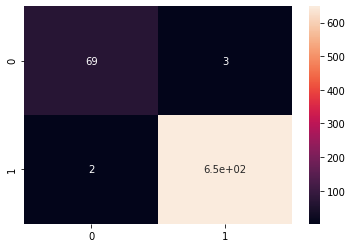

In [23]:
sns.heatmap(cm, annot=True)
plt.show()

In [24]:
actual_status=data['Covid']

In [25]:
actual_status=actual_status[0:722]

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import plotly.express as px

fpr, tpr, thresholds = roc_curve(actual_status, predictions)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



AttributeError: ignored

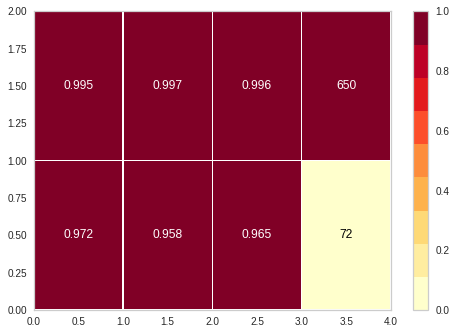

In [27]:

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import TimeSeriesSplit

# Specify the target classes
classes = ["Corona-Positive ", "Corona-Negative"]

# Create the training and test data
tscv = TimeSeriesSplit()

visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [28]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import precision_recall_curve


X, y = load_occupancy()
visualizer = precision_recall_curve(GaussianNB(), X, y)

ValueError: ignored

In [29]:
from yellowbrick.classifier import precision_recall_curve


X, y = load_occupancy()
visualizer = precision_recall_curve(GaussianNB(), X, y)

ValueError: ignored

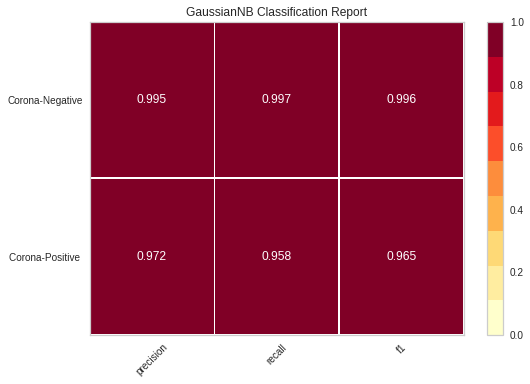

ValueError: ignored

In [30]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import precision_recall_curve

X, y = load_occupancy()


visualizer = precision_recall_curve(GaussianNB(), X, y)

0.9930747922437673

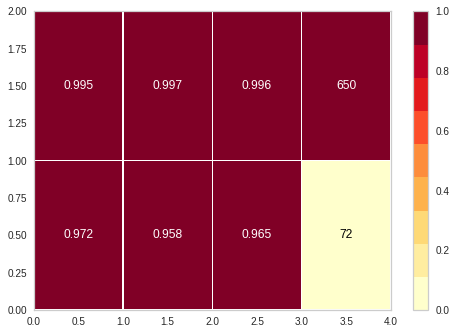

In [31]:

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import TimeSeriesSplit

# Specify the target classes
classes = ["Corona-Positive ", "Corona-Negative"]

# Create the training and test data
tscv = TimeSeriesSplit()

visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

In [67]:
import wandb


In [66]:
wandb.init(project="visualize-sklearn")

_runtime,90
_timestamp,1622288066
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [68]:
labels="Covid-Negative","Covid-Positive"

In [69]:
wandb.sklearn.plot_confusion_matrix(y_test, predictions, labels)


In [35]:
pip install wandb


     |████████████████████████████████| 1.8MB 4.9MB/s 
     |████████████████████████████████| 174kB 19.2MB/s 
     |████████████████████████████████| 133kB 24.7MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=83ef3f12b41a99cb3dd290577fadd5efb8de279029041d7e2d87ff3d0444f273
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=11ea4998f121a18d9abdc01a8f18fcf5e9fc9ec5b4e7084f74b2502eea6da986
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
data.columns

In [71]:
y_fin=predictions.tolist()


In [72]:
fin_co=data['Covid'].tolist()

In [73]:
len(fin_co)

2405

In [74]:
nf = len(fin_co)
nf

2405

In [75]:
nf_fin= fin_co
nf_fin

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

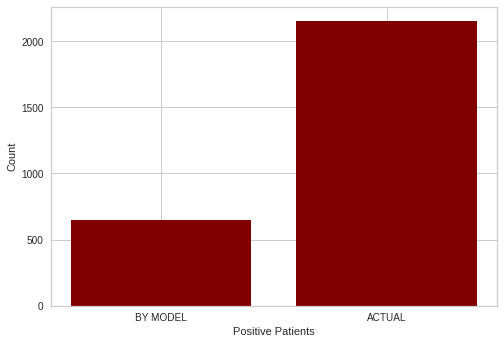

In [76]:
data_bar = {'BY MODEL':y_fin.count(1), 'ACTUAL':nf_fin.count(1)}
detect = list(data_bar.keys())
value = list(data_bar.values())
plt.xlabel("Positive Patients")
plt.ylabel("Count")
plt.bar(detect,value, color ='maroon', width = 0.8)
plt.show()

In [ ]:
x_temp=X_test['TEMP'].tolist()
x_oxy=X_test['SPO2'].tolist()
x_pulse=X_test['PULSE'].tolist()


In [ ]:
positive_temp = []
positive_oxy=[]
positive_pulse=[]
negative_temp = []
negative_oxy=[]
negative_pulse=[]
for i in range(len(y_fin)):
  if y_fin[i] == 1:
    print("Index : ", i,"  Values : ", y_fin[i], "  Temp : ", x_temp[i], " Oxygen : ", x_oxy[i], " Pulse : ", x_pulse[i])
    positive_temp.append(x_temp[i])
    positive_oxy.append(x_oxy[i])
    positive_pulse.append(x_pulse[i])

  else :
    print("Index : ", i,"  Values : ", y_fin[i], "  Temp : ", x_temp[i], " Oxygen : ", x_oxy[i], " Pulse : ", x_pulse[i])
    negative_temp.append(x_temp[i])
    negative_oxy.append(x_oxy[i])
    negative_pulse.append(x_pulse[i])


In [ ]:
plt.figure(figsize=(10,6))
plt.hist(positive_temp, alpha=0.5,color='#5499c7', bins=30,label='Corona Positive=Blue')
plt.hist(negative_temp, alpha=0.5,color='#82e0aa', bins=30,label='Corona Negative=Green')
plt.legend()
plt.xlabel('Corona Prediction By Model using Temp')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(positive_oxy, alpha=0.5,color='#884ea0', bins=30,label='Corona Positive=Purple')
plt.hist(negative_oxy, alpha=0.5,color='#ec7063', bins=30,label='Corona Negative=Red')
plt.legend()
plt.xlabel('Corona Prediction By Model using SpO2')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(positive_pulse, alpha=0.5,color='Olive', bins=30,label='Corona Positive=Olive')
plt.hist(negative_pulse, alpha=0.5,color='lime', bins=30,label='Corona Negative=lime')
plt.legend()
plt.xlabel('Corona Prediction By Model using Pulse-rate')
plt.ylabel('Count')